In [1]:
import pandas as pd 
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, plot_roc_curve, classification_report
from sklearn.ensemble import RandomForestClassifier

# 와인품종 분류

## 데이터 로드 및 확인

In [2]:
x,y = load_wine(return_X_y= True)

In [3]:
print(load_wine().DESCR)
print(load_wine().feature_names,'|', load_wine().target_names)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [4]:
df = pd.DataFrame(load_wine().data, columns = load_wine().feature_names)
df['class'] = load_wine().target
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [5]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


## 데이터 스케일링및 분할

In [6]:
scaled_x = StandardScaler().fit_transform(x)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x , y, test_size=0.3, stratify=y, random_state= 0)

## 모델 생성 

- Random Forest Classifier 파라메터 
    - bootstrap : 부트스트랩 사용여부 (default =True ; 복원샘플링), (False = 전체 데이터를 이용해 학습)
    - criterion: 트리 분할에 사용할 알고리즘 (gini, entropy)
    - max_depth: 나무의 최대 깊이
    - min_samples_split : 내부 노드를 분할하는데 필요한 최소 샘플 수
    - n_estimators: 생성할 트리의 개수 (default =100)

In [17]:
model = RandomForestClassifier(min_samples_split=3, criterion = 'entropy', bootstrap= False)
# 정보획득량
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy',
                       min_samples_split=3)

## 모델 평가

In [20]:
y_hat = model.predict(x_test)

In [21]:
print(f'정확도: {accuracy_score(y_test, y_hat)}')
# accuracy_score, confusion_matrix, precision_score, roc_auc_score, plot_roc_curve, classification_report
report = classification_report(y_test, y_hat)
print(report)

정확도: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [22]:
cm = confusion_matrix(y_test, y_hat)
cm

array([[18,  0,  0],
       [ 0, 21,  0],
       [ 0,  0, 15]], dtype=int64)

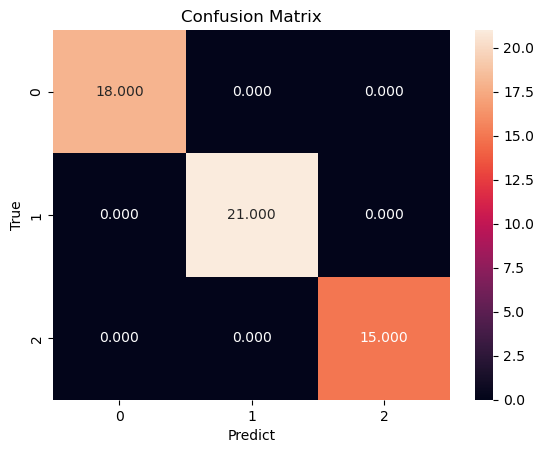

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot= True, fmt='.3f')
plt.ylabel('True')
plt.xlabel('Predict')
plt.title('Confusion Matrix')
plt.show()

## 트리 시각화

In [24]:
from sklearn.tree import export_graphviz

estimator = model.estimators_[2]
#100개의 나무중에 2번째 나무를 저장

export_graphviz(estimator, out_file='tree.dot', class_names = load_wine().target_names, feature_names= load_wine().feature_names, precision=3, # 소수점 정밀도
               filled=True,# 클래스별 색깔 채우기
               rounded= True) #박스 모양을 둥굴게 그려서 출력)

- graphviz 패키지 설치
>- anaconda 프롬프트 실행
>- conda install python-graphviz
>- 주피터 노트북 제기동

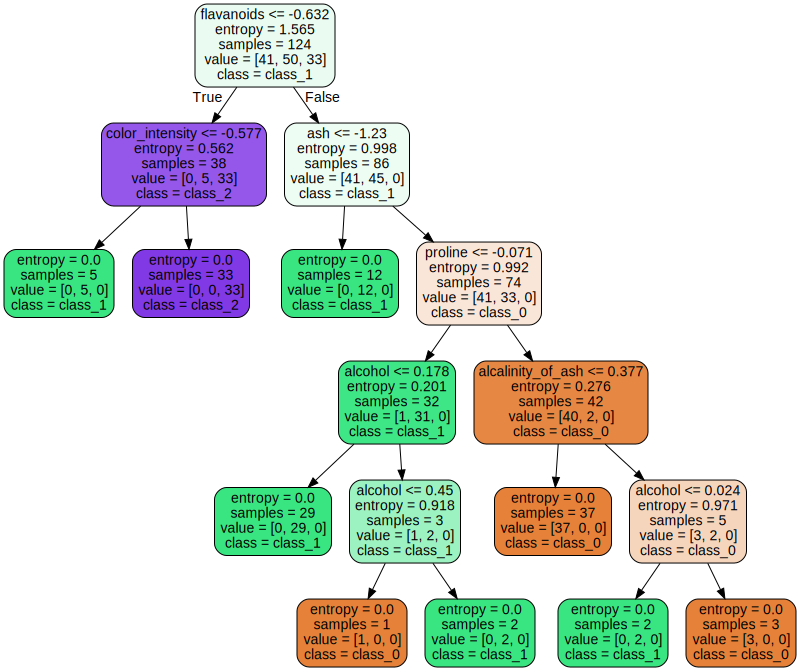

In [25]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

## Feature importance
- Decision Tree 알고리즘이 학습을 통해 규칙을 정하는데 있어서 피쳐의 중요한 역할 지표를 제공하는 속성
- 일반적으로 값이 높을수록 해당 피처의 중요도가 높다는 의미로 해석

In [26]:
model.feature_importances_

array([0.09089787, 0.02010225, 0.01088436, 0.03232391, 0.03465979,
       0.04488909, 0.20631332, 0.00620693, 0.02183548, 0.15158637,
       0.05014353, 0.14400259, 0.1861545 ])

In [47]:
importance = {k:v for k, v in zip (load_wine().feature_names, model.feature_importances_)}
importance_df = pd.DataFrame(pd.Series(importance), columns = ['importance'])
importance_df = importance_df.sort_values('importance', ascending = False)

In [43]:
# importance_df = pd.DataFrame({k:v for k, v in zip (load_wine().feature_names, model.feature_importances_)}, index = ['importance'])
# importance_df.sort_values('importance', axis = 1, ascending= False)

,flavanoids,proline,color_intensity,od280/od315_of_diluted_wines,alcohol,hue,total_phenols,magnesium,alcalinity_of_ash,proanthocyanins,malic_acid,ash,nonflavanoid_phenols
importance,0.206313,0.186155,0.151586,0.144003,0.090898,0.050144,0.044889,0.03466,0.032324,0.021835,0.020102,0.010884,0.006207


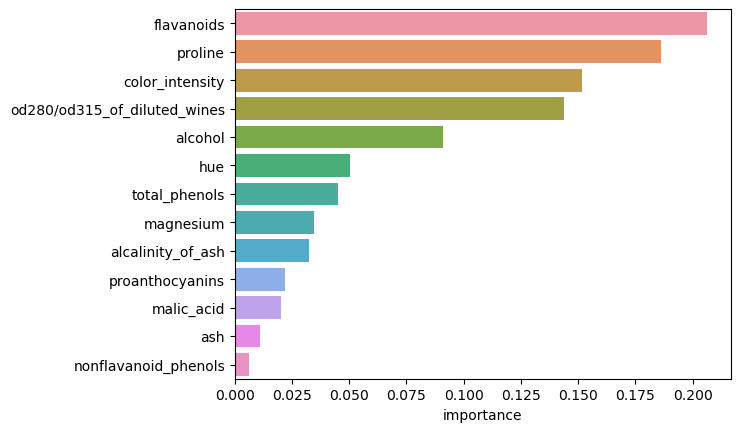

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(data= importance_df, x= 'importance', y= importance_df.index)
plt.show()